In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plot_energy_vs_steps_p(filenames, xlim=[],title='Potential energy vs steps', yrange = [-6877.5,-6873.5], xrange = [0,400], penalty = True, W=0.1):
    all_data = []

    # Read the lines from each file in the list
    for filename in filenames:
        with open(filename, 'r') as file:
            lines = file.readlines()
            data = [line.strip().split() for line in lines]
            all_data.extend(data)

    # Convert the data to float
    energies = np.array([float(all_data[0][0])]+[float(line[0]) for line in all_data])
    energies_p = np.array([0]+[float(line[1]) for line in all_data])
    
    # Create a list of steps
    steps = list(range(0, len(energies)))
        
    # detect energy minimum
    steps_min_list = []
    steps_saddle_list = []
    e_min_list = []
    e_saddle_list = []
    e_history_list = []
    barrier_list = []
    n_steps = len(energies)
    step_counter = 0
    E_th = W*np.exp(-3)
    
    # record the first minimum
    e_min_list.append(energies[0])
    e_history_list.append(energies[0])
    steps_min_list.append(0)
    for i, E_phi in enumerate(energies_p):
        current_step = i
        step_counter += 1
        if E_phi<E_th and step_counter>1:
            step_counter = 0
            
            # check if penalty energy reaches minimum
            if current_step+1<len(energies_p):
                while (energies_p+energies)[current_step]>(energies_p+energies)[current_step+1]:
                    current_step = current_step+1
            
            # record the barrier height
            e_barrier = energies[i-1]-e_min_list[-1]
            if e_barrier<W/2:
                continue
            barrier_list.append(e_barrier)
            
            # record the step number
            steps_min_list.append(current_step)
            steps_saddle_list.append(i-1)
            
            # record the saddle energy
            e_saddle_list.append(energies[i-1])
            e_history_list.append(energies[i-1])
            
            # record the minimum energy
            e_min_list.append(energies[current_step])
            e_history_list.append(energies[current_step])
            
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    
    # Plot each line separately
    ax.plot(steps, energies, '-k', label='Potential energy')
    if penalty:
        ax.plot(steps, energies+energies_p, '-r', label='Potential energy with penalty')
        
    ax.plot(steps_min_list, e_min_list, 'o', color='blue', label='Minimum', fillstyle='none')
    ax.plot(steps_saddle_list, e_saddle_list, 'o', color='green', label='Saddle', fillstyle='none')

    ax.set_xlabel('Steps')
    ax.set_ylabel('Potential energy (eV)')
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    plt.title(title)
    ax.legend(frameon=False)
    plt.show()

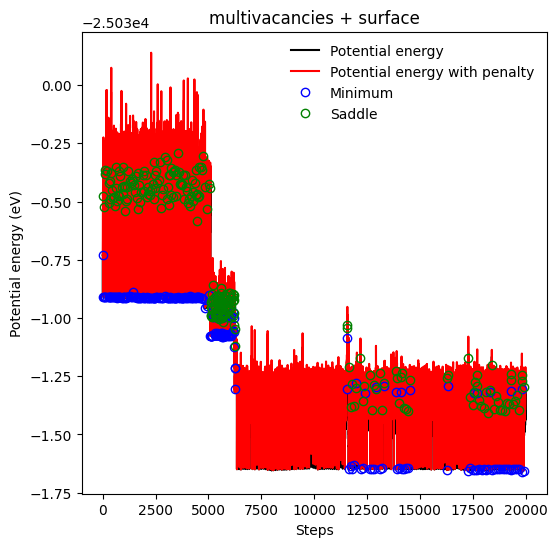

In [30]:
plot_energy_vs_steps_p(['./test2.txt'],title="multivacancies + surface", yrange = None, xrange = None, penalty=True, W=0.1)

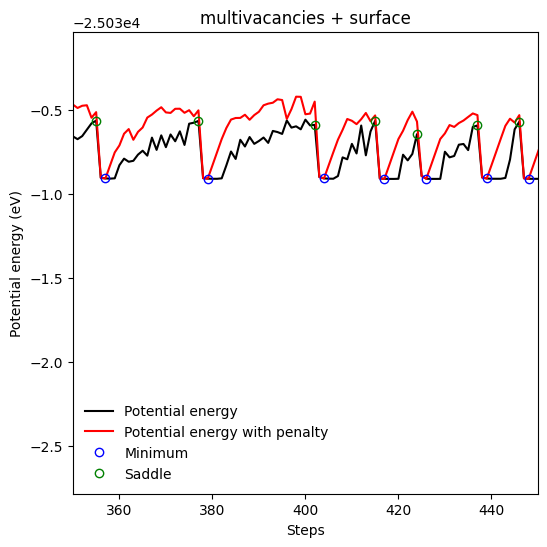

In [31]:
plot_energy_vs_steps_p(['./test3.txt','./test4.txt','./test5.txt'],title="multivacancies + surface", yrange = None, xrange = [350,450], penalty=True)

In [32]:
def plot_events(filenames, xlim=[],title='Potential energy vs steps', yrange = [-6877.5,-6873.5], xrange = [0,400], penalty = True, W=0.1, figsize=(6,6)):
    all_data = []

    # Read the lines from each file in the list
    for filename in filenames:
        with open(filename, 'r') as file:
            lines = file.readlines()
            data = [line.strip().split() for line in lines]
            all_data.extend(data)

    # Convert the data to float
    energies = np.array([float(all_data[0][0])]+[float(line[0]) for line in all_data])
    energies_p = np.array([0]+[float(line[1]) for line in all_data])
    
    # Create a list of steps
    steps = list(range(0, len(energies)))
        
    # detect energy minimum
    steps_min_list = []
    steps_saddle_list = []
    e_min_list = []
    e_saddle_list = []
    e_history_list = []
    barrier_list = []
    n_steps = len(energies)
    step_counter = 0
    E_th = W*np.exp(-3)
    
    # record the first minimum
    e_min_list.append(energies[0])
    e_history_list.append(energies[0])
    steps_min_list.append(0)
    for i, E_phi in enumerate(energies_p):
        current_step = i
        step_counter += 1
        if E_phi<E_th and step_counter>1:
            step_counter = 0
            
            # check if penalty energy reaches minimum
            if current_step+1<len(energies_p):
                while (energies_p+energies)[current_step]>(energies_p+energies)[current_step+1]:
                    current_step = current_step+1
            
            # record the barrier height
            e_barrier = energies[i-1]-e_min_list[-1]
            if e_barrier<W/2:
                continue
            barrier_list.append(e_barrier)
            
            # record the step number
            steps_min_list.append(current_step)
            steps_saddle_list.append(i-1)
            
            # record the saddle energy
            e_saddle_list.append(energies[i-1])
            e_history_list.append(energies[i-1])
            
            # record the minimum energy
            e_min_list.append(energies[current_step])
            e_history_list.append(energies[current_step])
            
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1,1,1)
    
    # Plot each line separately     
    steps_min_history = np.arange(len(steps_min_list))
    steps_saddle_history = np.arange(len(steps_saddle_list))+0.5
    ax.plot(steps_min_history, e_min_list, 'o', color='blue', label='Minimum', fillstyle='none')
    ax.plot(steps_saddle_history, e_saddle_list, 'o', color='green', label='Saddle', fillstyle='none')
    
    steps_history = np.arange(len(e_history_list))/2
    ax.plot(steps_history, e_history_list, '-k', label='Potential energy')

    ax.set_xlabel('Steps')
    ax.set_ylabel('Potential energy (eV)')
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    plt.title(title)
    ax.legend(frameon=False)
    plt.show()

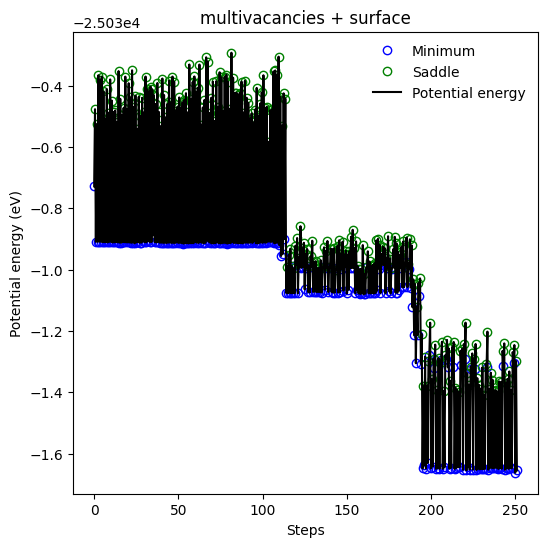

In [35]:
plot_events(['./test2.txt'],title="multivacancies + surface", yrange = None, xrange = None, penalty=False)

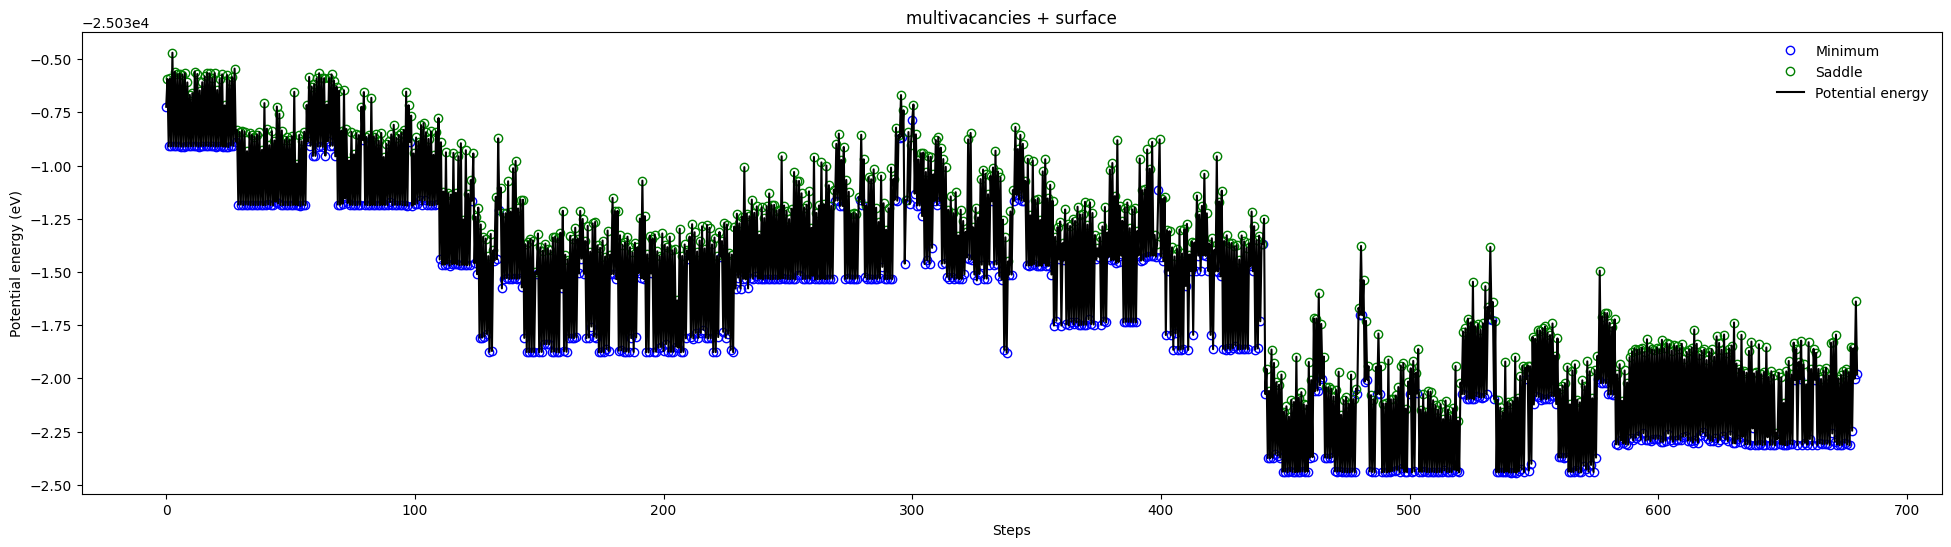

In [36]:
plot_events(['./test3.txt','./test4.txt','./test5.txt'],title="multivacancies + surface", yrange = None, xrange = None, penalty=False, figsize=(24,6))